In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

df = pd.read_csv("location_counts.csv")
print(df.head(10))

                    location  tweet_count
0     -73.0563665,41.2226005          149
1     -88.8565485,43.8520499            1
2     -71.0470048,42.3386862            2
3  -116.93811891,33.73223653            1
4   -84.11666627,39.85665632            1
5   -93.26408193,45.13109253            1
6   -97.26021015,37.72191791            1
7     -94.5270367,38.8890543            3
8   -95.65762775,29.88618211            1
9   -73.86219686,41.08561185            1


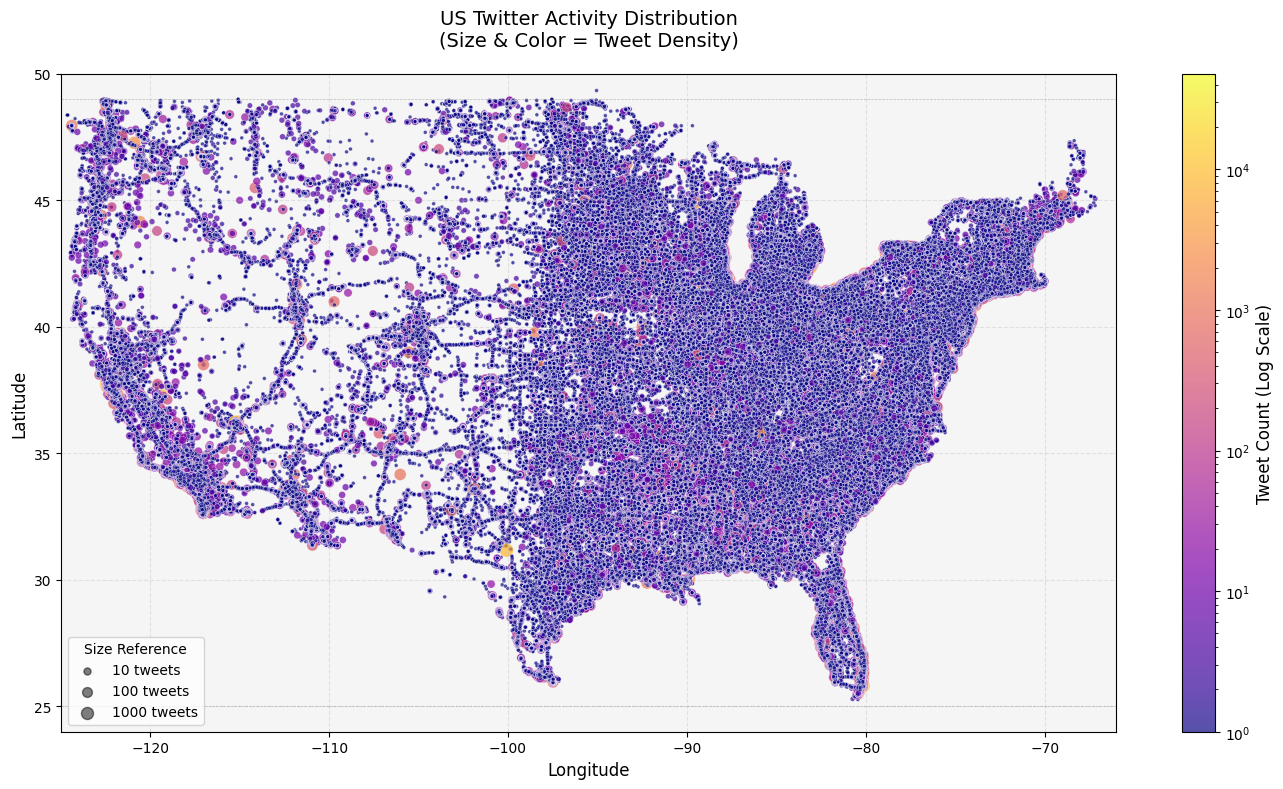

In [4]:
#Extracting the coordinates
df[['longitude', 'latitude']] = df['location'].str.split(',', expand=True).astype(float)

#Calculating logarithmic values
df['log_count'] = np.log10(df['tweet_count'] + 1)

#Setting up the plot
plt.figure(figsize=(14, 8))
ax = plt.gca()

#Creating scatter plot with dual encoding
scatter = ax.scatter(
    df['longitude'],
    df['latitude'],
    c=df['tweet_count'],
    s=df['log_count'] * 25,
    cmap='plasma',
    norm=LogNorm(),
    alpha=0.7,
    edgecolor='white',
    linewidth=0.3
)

#Adding color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Tweet Count (Log Scale)', fontsize=12)

#Setting US boundaries
plt.xlim(-125, -66)  # Continental US longitude range
plt.ylim(24, 50)     # Continental US latitude range

#Adding reference lines
plt.plot([-125, -66], [25, 25], color='gray', linestyle='--', linewidth=0.5, alpha=0.5)  # Southern border
plt.plot([-125, -66], [49, 49], color='gray', linestyle='--', linewidth=0.5, alpha=0.5)  # Northern border

#Adding labels and title
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('US Twitter Activity Distribution', fontsize=14, pad=20)

#Grid and Style
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().set_facecolor('#f5f5f5')  # Light gray background

#Adding legend for size comparision
for count in [10, 100, 1000]:
    plt.scatter([], [], c='k', alpha=0.5, s=np.log10(count + 1)*25,
               label=f'{count} tweets')
plt.legend(title='Size Reference', frameon=True, 
          facecolor='white', loc='lower left')

plt.tight_layout()
plt.show()